<a href="https://colab.research.google.com/github/Kiarendil/ML_FIAN2020_hometasks/blob/master/%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2_%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%BB_libgen_scimag_queries_db_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# О блокноте

Работу выполнил:

**Иванов Кирилл Максимович**

Группа: А02-201в, Физтех-школа ЛФИ

Моя научная работа посвящена изучению физики элементарных частиц; в частности, я работаю на Большом адронном коллайдере в ЦЕРНе (Женева) в области флейворной физики. 

Реферат по истории науки называется "История изучения спектроскопии Ξb (прелестно-странных) барионов в физике элементарных частиц", и этой же теме (спектроскопия Ξb барионов в эксперименте CMS на БАК) посвящена моя кандидатская диссертация.

Поэтому в рамках настоящего проекта по анализу данных в истории науки я провожу изучение публикационной активности в области физики элементарных частиц с помощью нижеприведенных ключевых слов.

In [3]:
words = [
  
'high energy physics',
'meson',
'baryon',
'hadron',
'elementary particle',
'neutrino',

]

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [5]:
%%capture
!pip install --upgrade --no-cache-dir gdown
!pip install bertopic
!pip install sentence-transformers

In [6]:
!gdown --id 1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA
From (redirected): https://drive.google.com/uc?id=1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA&confirm=t&uuid=2a14a7d9-7208-45a9-802e-8108d734be65
To: /content/scimag.7z
100% 2.86G/2.86G [00:34<00:00, 82.8MB/s]


In [7]:
!ls -al

total 2795608
drwxr-xr-x 1 root root       4096 May  4 20:33 .
drwxr-xr-x 1 root root       4096 May  4 20:28 ..
drwxr-xr-x 4 root root       4096 May  3 13:30 .config
drwxr-xr-x 1 root root       4096 May  3 13:31 sample_data
-rw-r--r-- 1 root root 2862681568 May  4 20:33 scimag.7z


In [8]:
!7z e scimag.7z -o/content


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2862681568 bytes (2731 MiB)

Extracting archive: scimag.7z
--
Path = scimag.7z
Type = 7z
Physical Size = 2862681568
Headers Size = 146
Method = LZMA:23
Solid = -
Blocks = 1

  0%      0% - scimag.db                  1% - scimag.db                  2% - scimag.db                  3% - scimag.db                  4% - scimag.db                  5% - scimag.db                  6% - scimag.db                  7% - scimag.db                  8% - scimag.db

In [9]:
import sqlite3

In [10]:
con = sqlite3.connect("./scimag.db")

In [11]:
c = con.cursor()

In [12]:
c.execute('''SELECT * FROM sqlite_master WHERE type='table';''')

In [13]:
c.fetchall()

[('table',
  'scimag',
  'scimag',
  2,
  'CREATE TABLE "scimag" (\n"Doi" TEXT,\n  "Title" TEXT,\n  "Year" TEXT\n)'),
 ('table',
  'scimag_fts5',
  'scimag_fts5',
  0,
  'CREATE VIRTUAL TABLE scimag_fts5 using fts5\n             (Doi, Title, Year)'),
 ('table',
  'scimag_fts5_data',
  'scimag_fts5_data',
  2841938,
  "CREATE TABLE 'scimag_fts5_data'(id INTEGER PRIMARY KEY, block BLOB)"),
 ('table',
  'scimag_fts5_idx',
  'scimag_fts5_idx',
  2841939,
  "CREATE TABLE 'scimag_fts5_idx'(segid, term, pgno, PRIMARY KEY(segid, term)) WITHOUT ROWID"),
 ('table',
  'scimag_fts5_content',
  'scimag_fts5_content',
  2841940,
  "CREATE TABLE 'scimag_fts5_content'(id INTEGER PRIMARY KEY, c0, c1, c2)"),
 ('table',
  'scimag_fts5_docsize',
  'scimag_fts5_docsize',
  2841941,
  "CREATE TABLE 'scimag_fts5_docsize'(id INTEGER PRIMARY KEY, sz BLOB)"),
 ('table',
  'scimag_fts5_config',
  'scimag_fts5_config',
  2841942,
  "CREATE TABLE 'scimag_fts5_config'(k PRIMARY KEY, v) WITHOUT ROWID")]

In [14]:
c.execute('''SELECT * FROM scimag LIMIT 2;''')

In [15]:
c.fetchall()

[('10.1002/(sici)(1997)5:1<1::aid-nt1>3.0.co;2-8',
  'Detection of new spider toxins from a <em>Nephilengys borbonica</em> venom gland using on-line μ-column HPLC continuous flow (FRIT) FAB LC/MS and MS/MS',
  '1997'),
 ('10.1002/(sici)(1997)5:1<14::aid-nt2>3.0.co;2-8',
  'Identification by flow cytometry of Seiridin, one of the main phytotoxins produced by three <em>Seiridium</em> species pathogenic to cypress',
  '1997')]

In [16]:
names = list(map(lambda x: x[0], c.description))
names

['Doi', 'Title', 'Year']

In [17]:
new_list = []
for w in tqdm(words):
    # Generate a query
    query = """ SELECT * FROM scimag
                WHERE Title LIKE '%%%s%%'""" % w
    # Execute that query and get results
    c.execute(query)
    result_all = c.fetchall()
    # Add those results to your final list
    for i in tqdm(result_all):
        new_list.append(i)

100%|██████████| 6/6 [06:00<00:00, 60.01s/it]


После экспорта информации из базы данных, попробуем посмотреть, что получается.

In [18]:
df = pd.DataFrame(new_list, columns =['doi', 'title', 'year'])

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,doi,title,year
0,10.1002/meet.2008.1450450288,Supporting participation in communities of pra...,2008
1,10.1016/0003-4916(67)90129-7,Production of pions from nucleons by photons: ...,1967
2,10.1016/0003-4916(73)90327-8,Low-energy theorems and dispersion relations t...,1973
3,10.1016/0003-4916(74)90387-x,Perturbations in angular correlations as an in...,1974
4,10.1016/0003-4916(82)90035-5,SO(18) grand unified models with fractionally ...,1982


In [20]:
df.shape

(81575, 3)

In [21]:
df['doi'] = df['doi'].astype(str)
df['doi'] = df['doi'].str.lower()
df['year'] = df['year'].str.extract('^(\d{4})')
df['year'].replace('', np.nan, inplace=True)

df['year'].replace('nan', np.nan, inplace=True)

df = df[df['year'].notna()]

df = df[df['year'].notnull()]
df['year'] = df['year'].astype(int)

In [22]:
print(df['year'].min())
print(df['year'].max())

1800
2021


In [23]:
df_years = df[~df['year'].isin(df['year'].value_counts().lt(2).pipe(lambda s: s[s].index))]
df_years = df_years.drop_duplicates(subset=['doi', 'title', 'year'], keep='first')
df_years.head()

,doi,title,year
0,10.1002/meet.2008.1450450288,Supporting participation in communities of pra...,2008
1,10.1016/0003-4916(67)90129-7,Production of pions from nucleons by photons: ...,1967
2,10.1016/0003-4916(73)90327-8,Low-energy theorems and dispersion relations t...,1973
3,10.1016/0003-4916(74)90387-x,Perturbations in angular correlations as an in...,1974
4,10.1016/0003-4916(82)90035-5,SO(18) grand unified models with fractionally ...,1982


In [24]:
df_years.shape

(78188, 3)

После предобработки данных от "плохих" значений число событий немного уменьшилось.

In [25]:
df_years = df_years.sort_values('year')
df_years.head()

,doi,title,year
53623,10.1098/rspl.1800.0261,The Bakerian Lecture. On the Elementary Partic...,1800
53777,10.2307/109760,The Bakerian Lecture. On the Elementary Partic...,1800
54408,10.1080/14786441308638283,XII.\r <i>The Bakerian Lecture. O...,1813
54004,10.2307/107387,The Bakerian Lecture: On the Elementary Partic...,1813
53624,10.1098/rstl.1813.0008,The Bakerian Lecture: On the Elementary Partic...,1813


In [26]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

(array([1750., 1800., 1850., 1900., 1950., 2000., 2050.]),
 [Text(1750.0, 0, '1750'),
  Text(1800.0, 0, '1800'),
  Text(1850.0, 0, '1850'),
  Text(1900.0, 0, '1900'),
  Text(1950.0, 0, '1950'),
  Text(2000.0, 0, '2000'),
  Text(2050.0, 0, '2050')])

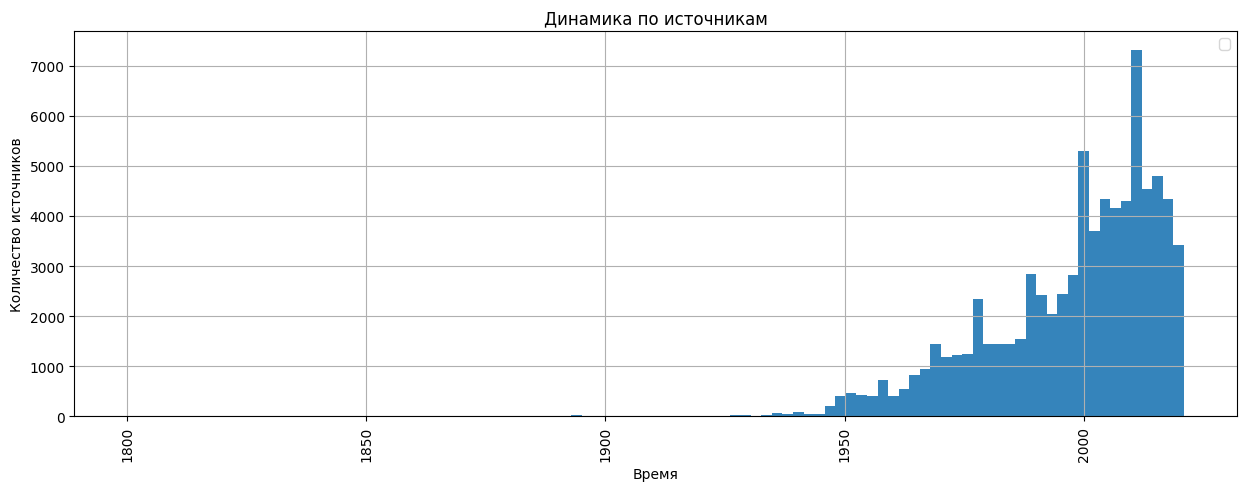

In [27]:
df_years['year'].hist(bins=100, figsize = (15,5), alpha=0.9)
pl.title('Динамика по источникам')
pl.xlabel('Время')
pl.ylabel('Количество источников')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

In [28]:
timestamps = df_years.year.to_list()
corpus = df_years.title.to_list()

[Мануал для использования библиотеки](https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html).

In [29]:
from umap import UMAP
from hdbscan import HDBSCAN

In [30]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer

In [31]:
# %%time

sentence_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05, random_state=123)

hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        prediction_data=True, gen_min_span_tree=True)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

topic_model = BERTopic(embedding_model=sentence_model, ctfidf_model=ctfidf_model, 
                       umap_model=umap_model, hdbscan_model=hdbscan_model)

topics, probs = topic_model.fit_transform(corpus)

In [32]:
topic_model.get_topic_info().head()

,Topic,Count,Name
0,-1,28773,-1_landolt_börnstein_atoms_group
1,0,2142,0_ix_qchs_brazil_confinement
2,1,1142,1_quasielastic_current_coherent_elastic
3,2,966,2_quarks_duality_iii_quarkonium
4,3,953,3_nufact_03_nuint07_boston


In [33]:
topic_model.get_topic_info().shape

(223, 3)

Наша модель выделила довольно много тем – 223, причем беглый взгляд на топ5 говорит нам о том, что не все из них "хорошие" – так, например, в первом одно из найденных ключевых слов – "brazil", еще в одном – "boston" и т.д. 

Давайте теперь попробуем посмотреть на это более визуально.

In [34]:
topic_model.visualize_topics()

In [35]:
hierarchical_topics = topic_model.hierarchical_topics(corpus)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 221/221 [00:01<00:00, 114.00it/s]


In [36]:
topic_model.visualize_barchart(top_n_topics=12)

В целом, видно, что хотя многие темы имеют отношение к физике частиц (например, 1, 2, 4, 5, 6, 8, 9, 11), некоторые -- 0, 3, 7, 10 выглядят лишними.

In [37]:
topic_model.visualize_heatmap()

In [38]:
topics_over_time = topic_model.topics_over_time(corpus, timestamps, nr_bins=15)

In [39]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)

Понять что-то по графикам зависимости топиков от времени тоже довольно сложно...

### Повторный анализ с предпроцессингом dataframe

Попробуем несколько улучшить сначала наш датафрейм, и уже потом провести его анализ. 

Так, в первую очередь, сейчас у нас здесь статьи в интервале от 1800 до 2021 года. Очевидно, при этом, что до первых десятилетий XX века, какого-то содержательного изучения физики частиц не проводилось. 
Поэтому ограничим наш dataframe условно 1910 годом:

In [40]:
df_years.shape

(78188, 3)

In [41]:
df_years = df_years[df_years['year'] > 1910]
df_years.shape

(78046, 3)

In [42]:
df_years.head()

,doi,title,year
21152,10.1086/621872,<i>Olenellus and Other Genera of the Mesonacid...,1911
19962,10.2307/20526688,Montesquieu et l'esclavage. Etude sur les orig...,1911
19887,10.2307/40517047,"Montesquieu et l'Esclavage, Etude sur les orig...",1911
18698,10.1524/zkri.1911.48.1.564,XXXV. Die chemische Zusammensetzung von Jameso...,1911
11558,10.2307/30068000,Olenellus and Other Genera of the Mesonacidaeb...,1911


Событий уменьшилось ненамного, однако графики от времени будут выглядеть приятнее. При этом первые же статьи 1911 года выдают явно "лишнии статьи":

In [43]:
print(df_years.iloc[0]['title'])
print(df_years.iloc[1]['title'])
print(df_years.iloc[2]['title'])
print(df_years.iloc[3]['title'])
print(df_years.iloc[4]['title'])

<i>Olenellus and Other Genera of the Mesonacidae</i>\r              . Charles D. Walcott
Montesquieu et l'esclavage. Etude sur les origines de l'opinion antiesclavagiste en France au XVIIIe siècleby Russell Parsons Jameson
Montesquieu et l'Esclavage, Etude sur les origines de l'opinion antiesclavagiste en France au XVIIIe siècleby Russell Parsons Jameson
XXXV. Die chemische Zusammensetzung von Jamesonit und Warrenit
Olenellus and Other Genera of the Mesonacidaeby Charles D. Walcott


Видим, что тут встречается много условно "испанского", в частности, что-то связаное с Jameson и другими испанскими словами (именами), которые попадают в выборку из-за вхождения в них подстроки `'meson'`. Попробуем "вручную" исключить эти вхождения: 

In [44]:
df_years[df_years['title'].str.contains('Jameson')].shape

(955, 3)

In [45]:
df_years[df_years['title'].str.contains('Mesona')].shape

(98, 3)

In [46]:
df_years[df_years['title'].str.contains('ameson')].shape

(1166, 3)

In [47]:
df_years = df_years[~df_years['title'].str.contains('ameson')]
df_years = df_years[~df_years['title'].str.contains('Mesona')]
df_years = df_years[~df_years['title'].str.contains('JAMESON')]
df_years.shape

(76696, 3)

In [48]:
df_years.head()

,doi,title,year
18276,10.1001/archinte.1914.00070110099005,THE PHYSIOLOGIC DEGENERATION OF THE MESONEPHROS,1914
8649,10.1007/bf02892266,Associated production of a K+meson and a hyper...,1915
2924,10.1002/ar.1090100102,"The mesonephric corpuscles of the sheep, cow, ...",1915
5694,10.1007/bf02823480,Cosmic ray evidence on the μ-meson magnetic mo...,1915
5695,10.1007/bf02823484,A probable example of multiple production of m...,1915


In [49]:
print(df_years.iloc[0]['title'])
print(df_years.iloc[1]['title'])
print(df_years.iloc[2]['title'])
print(df_years.iloc[3]['title'])
print(df_years.iloc[4]['title'])

THE PHYSIOLOGIC DEGENERATION OF THE MESONEPHROS
Associated production of a K+meson and a hyperfragment
The mesonephric corpuscles of the sheep, cow, and deer
Cosmic ray evidence on the μ-meson magnetic moment
A probable example of multiple production of mesons


In [50]:
df_years[df_years['title'].str.contains('Mesone')].shape

(448, 3)

In [51]:
df_years[df_years['title'].str.contains('MESONE')].shape

(37, 3)

In [52]:
df_years = df_years[~df_years['title'].str.contains('mesone')]
df_years = df_years[~df_years['title'].str.contains('Mesone')]
df_years = df_years[~df_years['title'].str.contains('MESONE')]
df_years.shape

(75925, 3)

In [53]:
df_years.head()

,doi,title,year
8649,10.1007/bf02892266,Associated production of a K+meson and a hyper...,1915
5694,10.1007/bf02823480,Cosmic ray evidence on the μ-meson magnetic mo...,1915
5695,10.1007/bf02823484,A probable example of multiple production of m...,1915
5537,10.1007/bf02780874,On the production of electronic component by f...,1916
7780,10.1007/bf02724910,Detection of high energy μ-mesons by an air Če...,1916


In [54]:
for i in range(10):
    print(df_years.iloc[i]['title'])

Associated production of a K+meson and a hyperfragment
Cosmic ray evidence on the μ-meson magnetic moment
A probable example of multiple production of mesons
On the production of electronic component by fast μ-mesons
Detection of high energy μ-mesons by an air Čerenkov counter
On the nature of the η-meson
On the symmetries concerning the scheme of elementary particles
Compound model and the relative parity of baryons
THE GENUS HADRONEMA UHL. (MIRIDÆ; HETEROPTERA.)
K-meson form factor in the bipion approximation


In [55]:
df_years = df_years[~df_years['title'].str.contains('HADRONE')]
df_years = df_years[~df_years['title'].str.contains('Hadrone')]
df_years = df_years[~df_years['title'].str.contains('Mesony')]

In [76]:
df_years.shape

(75874, 3)

In [56]:
for i in range(20):
    print(df_years.iloc[i]['title'])

Associated production of a K+meson and a hyperfragment
Cosmic ray evidence on the μ-meson magnetic moment
A probable example of multiple production of mesons
On the production of electronic component by fast μ-mesons
Detection of high energy μ-mesons by an air Čerenkov counter
On the nature of the η-meson
On the symmetries concerning the scheme of elementary particles
Compound model and the relative parity of baryons
K-meson form factor in the bipion approximation
The Elementary Particle of Positive Electricity
On the multi-nucleon capture of K−-mesons
The Elementary Particle of Positive Electricity
Mesonic decay of a singly charged fragment
Unusual decay of a χ-meson
The associated production of ax-meson and a Σ-particle in a nuclear disintegration
An example of the associated production of a heavy meson and a hyperon
The production of a pair of heavy mesons in a high-energy nuclear interaction
On the associated production of a meson-active4H1fragment and a K-meson in a nuclear disint

Датасет уменьшился на пару-другую тысяч событий, и явно заметны улучшения --в первых событиях нет совсем мусорных публикаций, не относящихся к физике частиц. 

Посмтроим теперь график от времени:

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

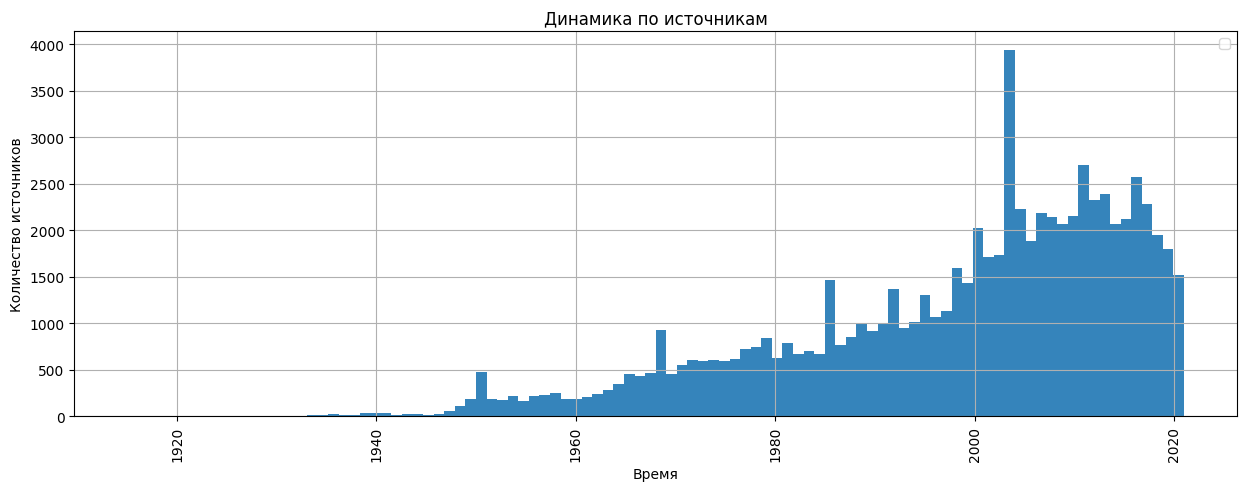

In [57]:
df_years['year'].hist(bins=100, figsize = (15,5), alpha=0.9)
pl.title('Динамика по источникам')
pl.xlabel('Время')
pl.ylabel('Количество источников')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

Построим для большей наглядности от 1940 года и далее:

(array([1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010.,
        2020., 2030.]),
 [Text(1930.0, 0, '1930'),
  Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

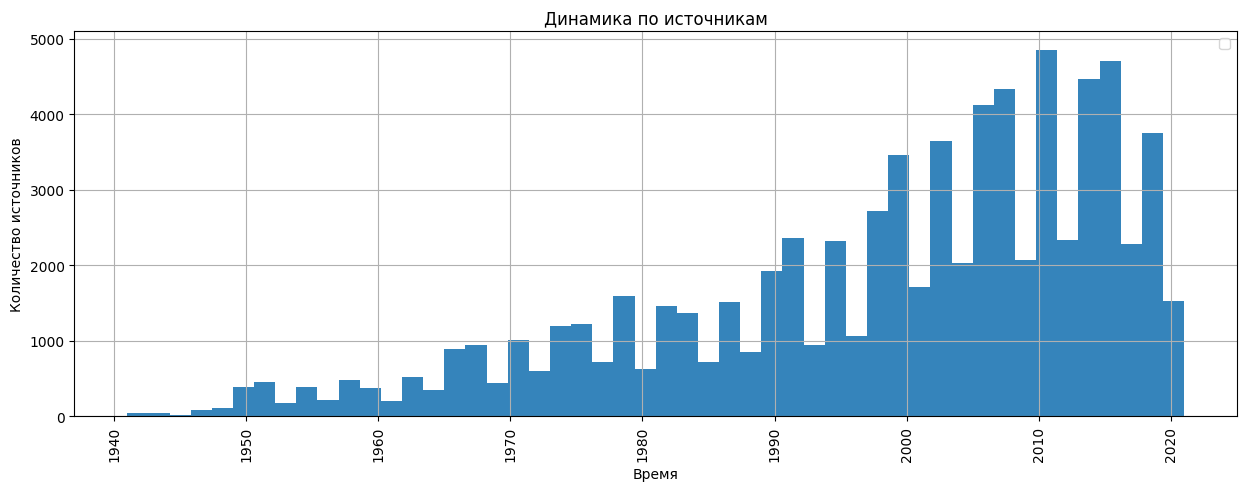

In [58]:
df_years[df_years['year'] > 1940]['year'].hist(bins=50, figsize = (15,5), alpha=0.9)
pl.title('Динамика по источникам')
pl.xlabel('Время')
pl.ylabel('Количество источников')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

(array([1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010.,
        2020., 2030.]),
 [Text(1930.0, 0, '1930'),
  Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

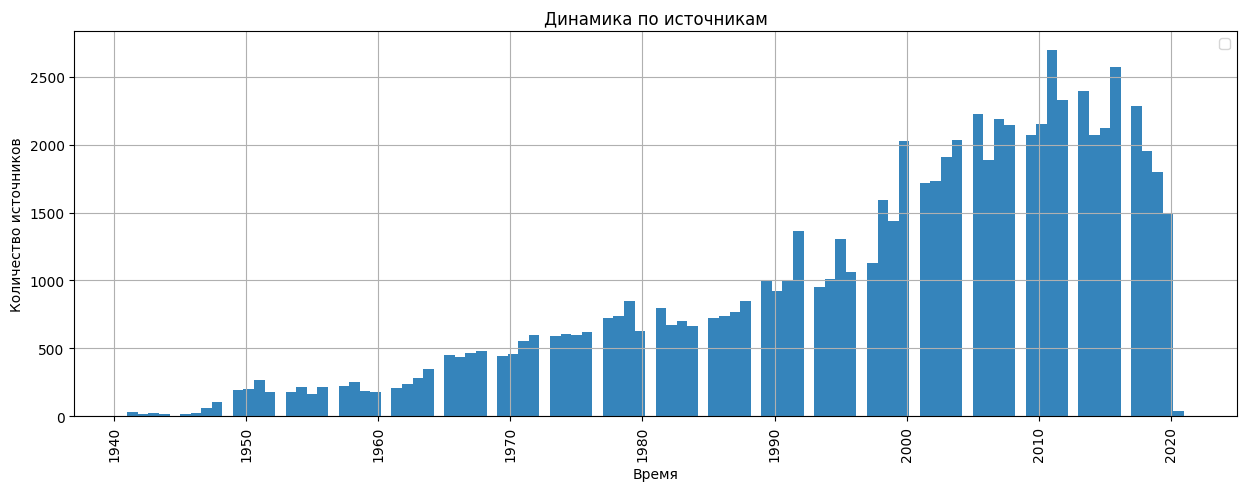

In [59]:
df_years[df_years['year'] > 1940]['year'].hist(bins=100, figsize = (15,5), alpha=0.9)
pl.title('Динамика по источникам')
pl.xlabel('Время')
pl.ylabel('Количество источников')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

В целом динамика довольно понятная, активный рост начинается примерно с 1950-60ых годов, что соответсвует исторической действительности, связанной с нашими ключевыми словами: 
Именно в начале 1960ых Гелл-Манн предложил свою кварковую модель, в рамках которой элементарные частицы, адроны, состоят из кварков, группирующихся по три (барионы) и по два (мезоны). 

Весьма естественным является и рост числа публикаций в последние десятилетия – наука активно развивается, а в 2008 году был запущен Большой адронный коллайдер, являющийся причиной и предметом множества публикаций. Некий спад в самом конце объясняется, скорее всего, некой задержкой в индексации статей базой данных, чем является реальным спадом. 

Также понятно, с чем связаны некие частые «выбросы» событий (узкие тонкие высокие пики на гистограмме) -- на более частом бининге видно, что во многих годах отсутствуют события, что объясняет выбросы при более крупном бининге -- просто техническая особенность, связанная с нашей базой данных и ее препроцессингом.

In [60]:
timestamps = df_years.year.to_list()
corpus = df_years.title.to_list()

In [61]:
# %%time

sentence_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05, random_state=123)

hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        prediction_data=True, gen_min_span_tree=True)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

topic_model = BERTopic(embedding_model=sentence_model, ctfidf_model=ctfidf_model, 
                       umap_model=umap_model, hdbscan_model=hdbscan_model)

topics, probs = topic_model.fit_transform(corpus)

In [62]:
topic_model.get_topic_info().head()

,Topic,Count,Name
0,-1,29638,-1_gamow_mrow_xml_com
1,0,4186,0_baryons_antibaryon_doubly_baryon
2,1,1895,1_semileptonic_constants_leptonic_nonleptonic
3,2,1061,2_aschaffenburg_septembe_tenth_spectroscopy
4,3,1058,3_supernova_supernovae_collapse_core


In [64]:
topic_model.get_topic_info().shape

(182, 3)

Получилось 182 топика, что поменьше прошлого раза.



In [65]:
topic_model.visualize_topics()

На визуализации можно явно выделить около 6-7 крупных кластеров, что тоже кучнее предыдущего результата. 

In [66]:
hierarchical_topics = topic_model.hierarchical_topics(corpus)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 180/180 [00:01<00:00, 116.62it/s]


In [67]:
topic_model.visualize_barchart(top_n_topics=12)

Первые топ-12 топиков выглядят намного более интересно -- только 2, 6 и 10 выглядят немного сомнительно (и то есть адекватные ключевые слова). Можно судить о том, что модель, кажется, действительно выделяет что-то содержатльное --- например, группирует отдельно физику нейтрино и бета-распадов, отдельно что-то связанное с космосом и солнцем, одельно барионы, отдельно кварки и constituent model, отдельно различные лептонные и полулептонные распады и т.д.

In [68]:
topic_model.visualize_heatmap()

In [78]:
topics_over_time = topic_model.topics_over_time(corpus, timestamps, nr_bins=35)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)

Наконец, крайне интересно посмотреть на представленный анализ тем от времени. Самый большой нулевой топик действительно получил бурное развитие в середине 1960 -- как раз после создания Гелл-Манном теории кварков. При этом тема лептонов и лептонных распадов тоже является весьма популярной и активно развивающейся. Тема 2 и ее развитие не совсем понятны, но крайне любопытно отметить резкий подъем к теме осцилляций (№5) в 1990-ых годах, что очень совпадает с историческим контекстом -- именно в конце 80ых и вплоть до начала 2000ых начали активно изучать нейтрино и их осцилляции, и крайне приятно видеть у этой темы резкий подъем в середине 2010ых – это, безусловно, вклад Нобелевской премии по физике, присужденной в 2015 году за обнаружение осцилляций нейтрино. 

In [70]:
df_freq = topic_model.get_topic_info()
topic_prob_df = pd.DataFrame({"title": corpus, "Topic": topics})
df_temp = pd.merge(df_freq, topic_prob_df, on='Topic')
df_final = pd.merge(df_temp, df_years, on='title')
df_final.head()

,Topic,Count,Name,title,doi,year
0,-1,29638,-1_gamow_mrow_xml_com,Associated production of a K+meson and a hyper...,10.1007/bf02892266,1915
1,-1,29638,-1_gamow_mrow_xml_com,On the production of electronic component by f...,10.1007/bf02780874,1916
2,-1,29638,-1_gamow_mrow_xml_com,Detection of high energy μ-mesons by an air Če...,10.1007/bf02724910,1916
3,-1,29638,-1_gamow_mrow_xml_com,On the nature of the η-meson,10.1007/bf02780872,1916
4,-1,29638,-1_gamow_mrow_xml_com,Compound model and the relative parity of baryons,10.1007/bf02724917,1916
